   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
K=1, Accuracy=0.98
K=2, Accuracy=0.98
K=3, Accuracy=1.00
K=4, Accuracy=0.98
K=5, Accuracy=1.00
K=6, Accuracy=1.00
K=7, Accuracy=1.00
K=8, Accuracy=1.00
K=9, Accuracy=1.00
K=10, Accuracy=1.00


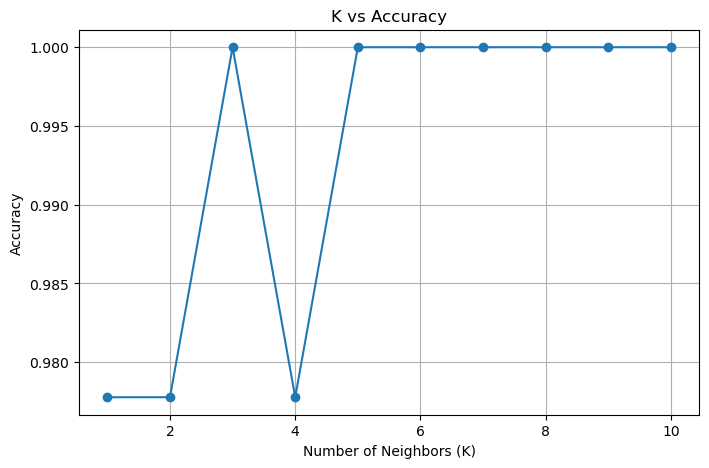


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



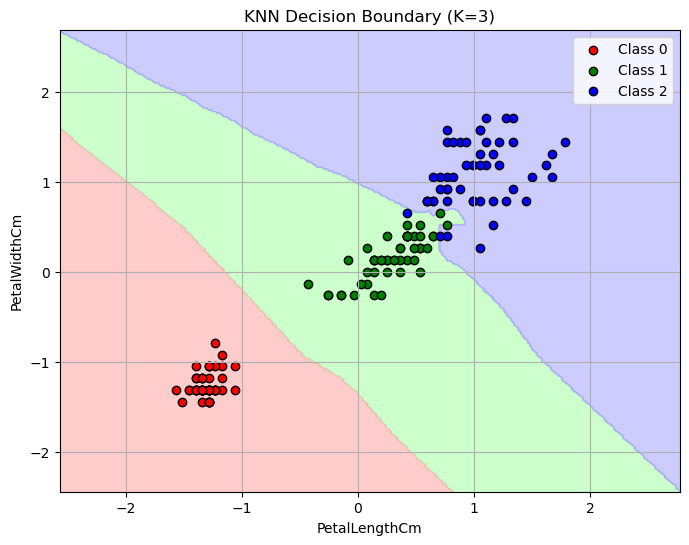

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap
df = pd.read_csv("Iris.csv")
df.drop("Id", axis=1, inplace=True)
print(df.head())
df["Species"] = df["Species"].astype("category").cat.codes  
X = df.drop("Species", axis=1)
y = df["Species"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
accuracies = []
k_range = range(1, 11)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.2f}")
plt.figure(figsize=(8,5))
plt.plot(k_range, accuracies, marker='o')
plt.title("K vs Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
best_k = accuracies.index(max(accuracies)) + 1
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
y_pred_final = final_knn.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))
feature1 = "PetalLengthCm"
feature2 = "PetalWidthCm"
X_vis = df[[feature1, feature2]].values
y_vis = df["Species"].values
scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_vis_scaled, y_vis)
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
for i, color in enumerate(cmap_bold):
    plt.scatter(X_vis_scaled[y_vis == i, 0], X_vis_scaled[y_vis == i, 1],
                c=color, edgecolor='k', label=f"Class {i}")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f"KNN Decision Boundary (K={best_k})")
plt.legend()
plt.grid(True)
plt.show()